In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#semicolon separated file
df = pd.read_csv('tutorial_data/eaadeff4-3258-4488-ad44-fc2854503391.csv', sep=';')

In [3]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,2.0


In [4]:
#only need rows with product RAINFOREST_RESIN
rainforest = df[df['product'] == 'RAINFOREST_RESIN']
kelp = df[df['product'] == 'KELP']


In [5]:
#do a line plot of the data put the timestamp on the x-axis and the mid_price on the y-axis for rainforest and kelp
rainforest.head()



,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,2.0
7,-1,300,RAINFOREST_RESIN,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,2.0
8,-1,400,RAINFOREST_RESIN,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,2.0


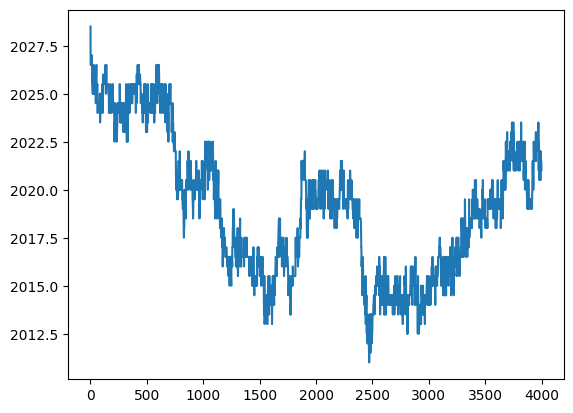

In [6]:
#do a plot of mid_price against index
plt.plot(kelp['mid_price'])

In [7]:
mean = rainforest['mid_price'].mean()
std  = rainforest['mid_price'].std()


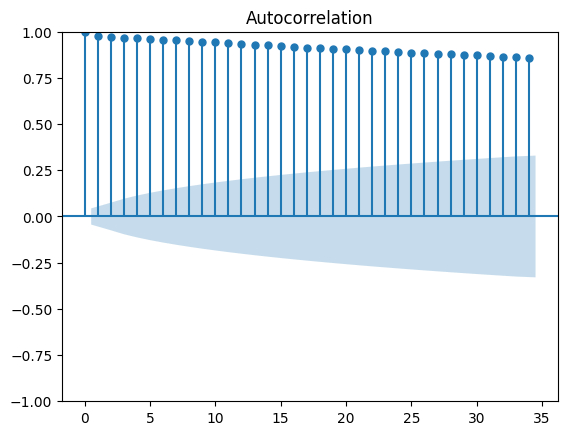

In [8]:
#acf for kelp
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(kelp['mid_price'])
plt.show()


In [9]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(kelp['mid_price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') 
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.310927
p-value: 0.168468
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [10]:
#difference the data
kelp['diff'] = kelp['mid_price'].diff()


/var/folders/gc/j85pjfkj2hj91x1mhg6zb6f80000gn/T/ipykernel_21564/2758742970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp['diff'] = kelp['mid_price'].diff()


In [11]:
kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,diff
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,NaN
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,-2.0
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,0.0
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,0.0
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,1.5
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,-0.5
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,0.0
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0,0.0


<Axes: >

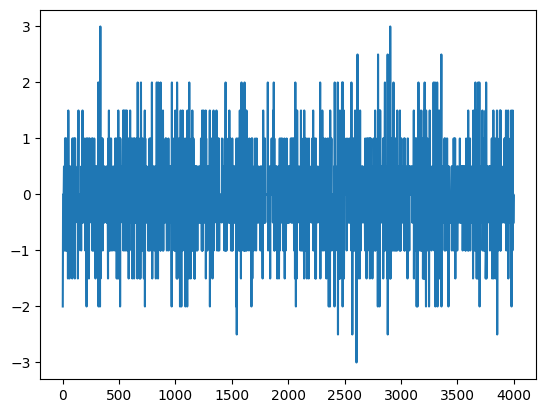

In [12]:
kelp['diff'].plot()

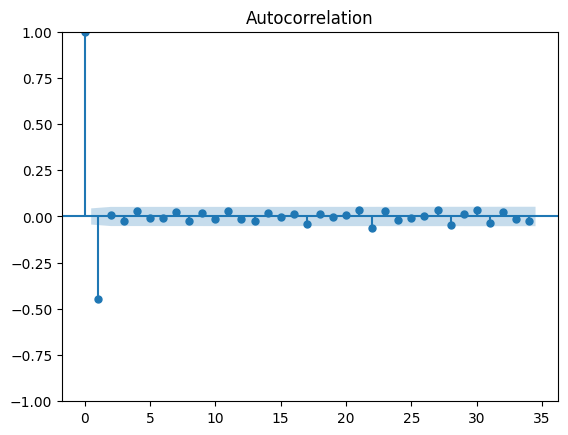

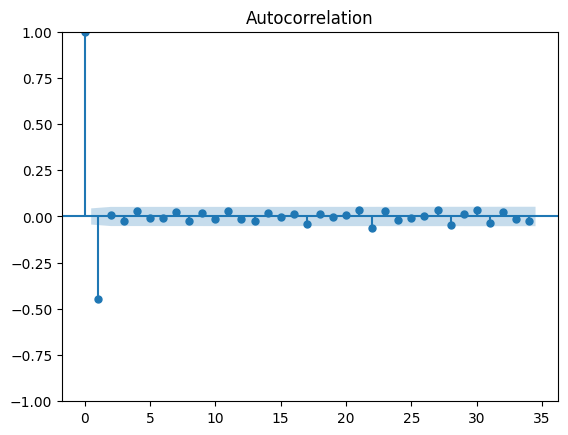

In [13]:
#do acf test on kelp diff
plot_acf(kelp['diff'].dropna())

/var/folders/gc/j85pjfkj2hj91x1mhg6zb6f80000gn/T/ipykernel_21564/3710423289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainforest['diff'] = rainforest['mid_price'].diff()


<Axes: >

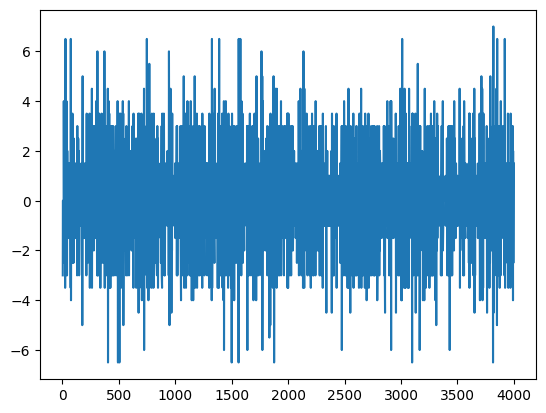

In [14]:
rainforest['diff'] = rainforest['mid_price'].diff()
rainforest['diff'].plot()

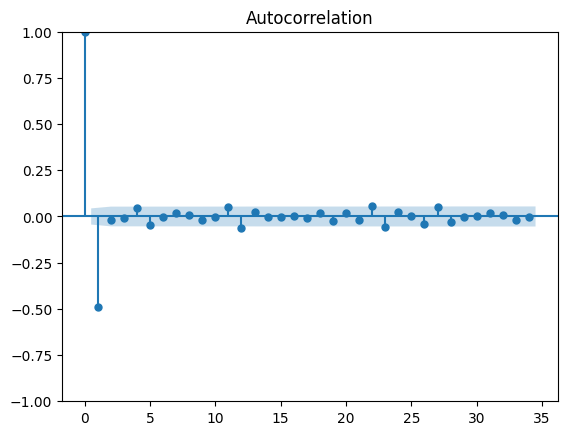

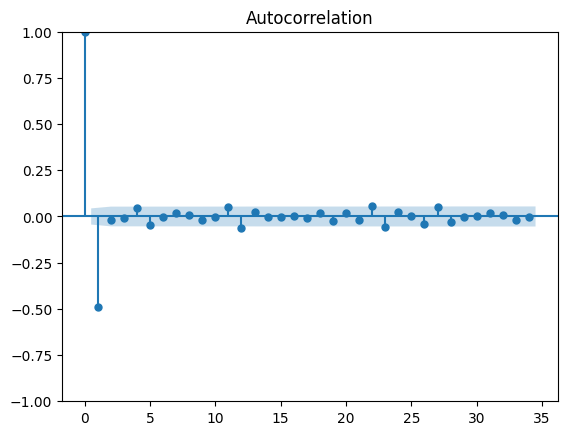

In [15]:
#acf
plot_acf(rainforest['diff'].dropna())

In [21]:
#for the kelp data take average of past two vals and use it to pred the next val

kelp['forecast'] = (0.6*kelp['mid_price'].shift(1) + 0.4*kelp['mid_price'].shift(2))

#test the error
from sklearn.metrics import mean_squared_error
error = mean_squared_error(kelp['mid_price'][2:], kelp['forecast'][2:])

print(error)

#test the R^2
from sklearn.metrics import r2_score
r2 = r2_score(kelp['mid_price'][2:], kelp['forecast'][2:])

print(r2)

0.48524024024024465
0.9627085889310124


/var/folders/gc/j85pjfkj2hj91x1mhg6zb6f80000gn/T/ipykernel_21564/2010848677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp['forecast'] = (0.6*kelp['mid_price'].shift(1) + 0.4*kelp['mid_price'].shift(2))


In [26]:
#skip the first row because it has a NaN value
kelp['forecast_diff'] = (kelp['diff'].shift(1) + kelp['diff'].shift(2))/2

#use the forecast_diff to predict the mid_price
kelp['forecast_mid_price'] = kelp['mid_price'].shift(1) + kelp['forecast_diff']


#test the error
error = mean_squared_error(kelp['mid_price'][3:], kelp['forecast_mid_price'][3:])
print(error)


#test the R^2
r2 = r2_score(kelp['mid_price'][3:], kelp['forecast_mid_price'][3:])
print(r2)

1.040811216825238
0.9198807678660607


/var/folders/gc/j85pjfkj2hj91x1mhg6zb6f80000gn/T/ipykernel_21564/2053350837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp['forecast_diff'] = (kelp['diff'].shift(1) + kelp['diff'].shift(2))/2
/var/folders/gc/j85pjfkj2hj91x1mhg6zb6f80000gn/T/ipykernel_21564/2053350837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp['forecast_mid_price'] = kelp['mid_price'].shift(1) + kelp['forecast_diff']


In [ ]:
kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,diff,forecast,forecast_diff
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,NaN,NaN,NaN
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,-2.0,NaN,NaN
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,0.0,2027.50,NaN
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,0.0,2026.50,-1.00
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,0.0,2026.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,1.5,2020.75,-0.75
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,-0.5,2021.25,0.50
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,0.0,2021.75,0.50
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0,0.0,2021.50,-0.25
